# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

In [2]:
#loading dataset
df=pd.read_csv("C:/Users/Ahmed/Downloads/Weather_Bangladesh.csv")

In [3]:
#displaying the first 5 rows of the dataset
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


In [4]:
#exploring the dataset
df.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


In [5]:
#checking for null values
df.isnull().sum()
#no null values found

Date             0
Temp9am          0
Temp3pm          0
MinTemp          0
MaxTemp          0
Rainfall         0
RainToday        0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
dtype: int64

In [6]:
#encoding categorical and discrete variables to be in numbers 
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_column' is the name of the column containing categorical variables
label_encoder = LabelEncoder()
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])

label_encoder2 = LabelEncoder()
df['WindDir9am'] = label_encoder2.fit_transform(df['WindDir9am'])

label_encoder3 = LabelEncoder()
df['WindDir3pm'] = label_encoder3.fit_transform(df['WindDir3pm'])

df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})

df

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,1,6.2,0.0,13,...,8,11,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,1,3.4,2.7,13,...,13,0,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,1,2.4,0.1,13,...,2,2,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,1,2.2,0.0,13,...,5,0,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,1,4.8,0.0,13,...,5,13,11,6,88,74,1008.3,1004.8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,10.5,17.9,8.6,19.6,0.0,0,2.0,7.8,10,...,13,10,22,20,73,52,1025.9,1025.3,2,2
3267,12-01-22,11.0,18.7,9.3,19.2,0.0,0,2.0,9.2,13,...,13,2,20,7,78,53,1028.5,1024.6,2,2
3268,13-01-22,10.2,17.3,9.4,17.7,0.0,0,2.4,2.7,13,...,14,3,15,13,85,56,1020.8,1015.0,6,6
3269,14-01-22,12.4,19.0,10.1,19.3,0.0,0,1.4,9.3,13,...,13,13,17,19,56,35,1017.3,1015.1,5,2


In [7]:
#creating dataframe for quantitative variables
rcol=['Date','RainToday']
quant=df.drop(columns=rcol)
quant

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,20.7,20.9,19.5,22.4,15.6,6.2,0.0,13,41,8,11,17,20,92,84,1017.6,1017.4,8,8
1,22.4,24.8,19.5,25.6,6.0,3.4,2.7,13,41,13,0,9,13,83,73,1017.9,1016.4,7,7
2,23.5,23.0,21.6,24.5,6.6,2.4,0.1,13,41,2,2,17,2,88,86,1016.7,1015.6,7,8
3,21.4,20.9,20.2,22.8,18.8,2.2,0.0,13,41,5,0,22,20,83,90,1014.2,1011.8,8,8
4,22.5,25.5,19.7,25.7,77.4,4.8,0.0,13,41,5,13,11,6,88,74,1008.3,1004.8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,10.5,17.9,8.6,19.6,0.0,2.0,7.8,10,37,13,10,22,20,73,52,1025.9,1025.3,2,2
3267,11.0,18.7,9.3,19.2,0.0,2.0,9.2,13,30,13,2,20,7,78,53,1028.5,1024.6,2,2
3268,10.2,17.3,9.4,17.7,0.0,2.4,2.7,13,24,14,3,15,13,85,56,1020.8,1015.0,6,6
3269,12.4,19.0,10.1,19.3,0.0,1.4,9.3,13,43,13,13,17,19,56,35,1017.3,1015.1,5,2


In [8]:
#creating df for qualitative variables
removeCol=['RainToday']
quali=df[removeCol]

quali

,RainToday
0,1
1,1
2,1
3,1
4,1
...,...
3266,0
3267,0
3268,0
3269,0


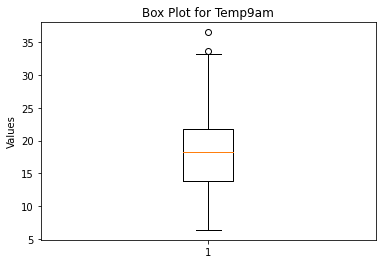

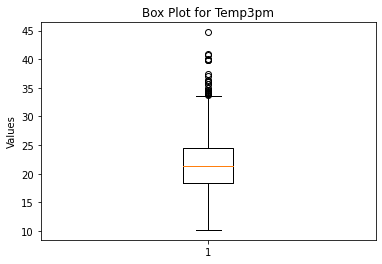

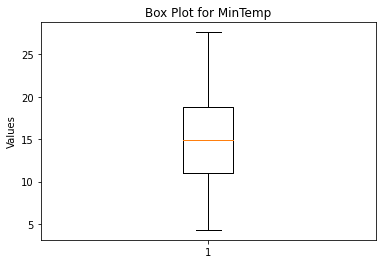

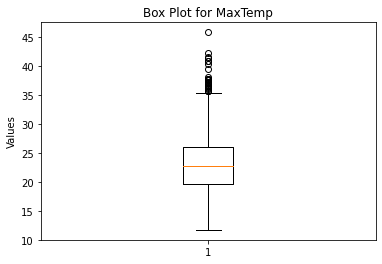

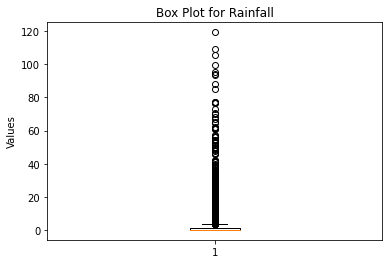

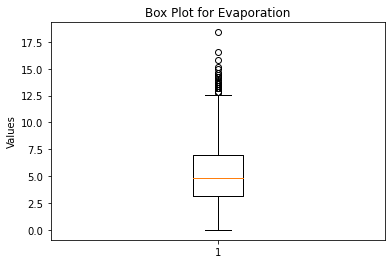

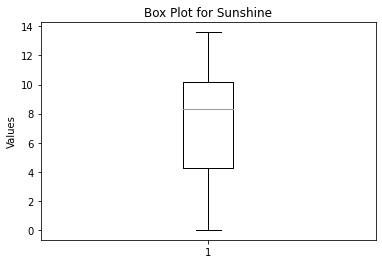

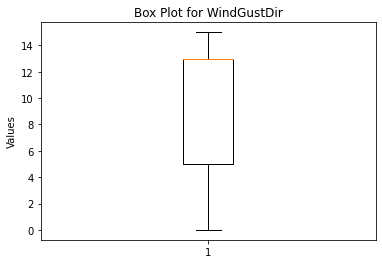

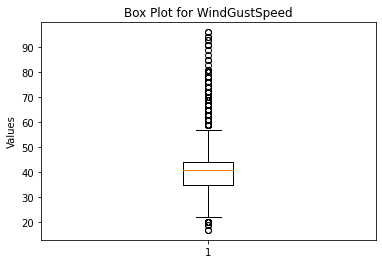

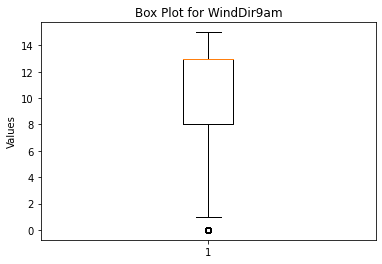

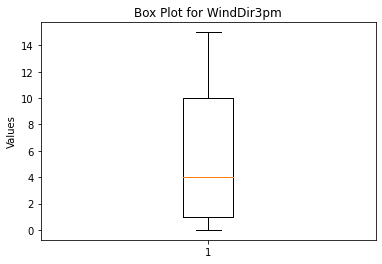

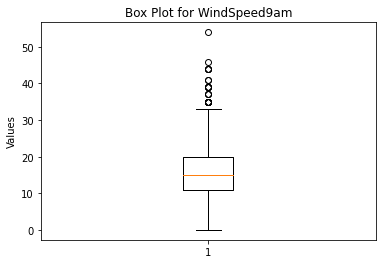

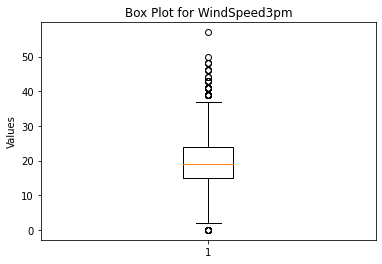

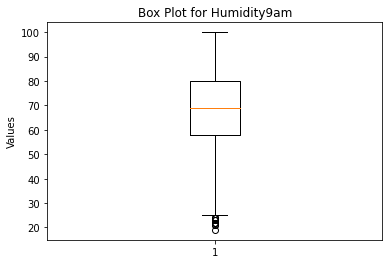

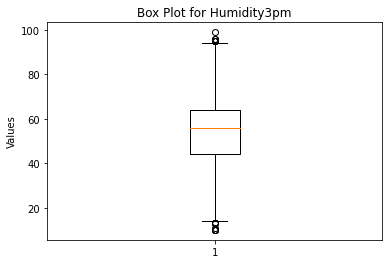

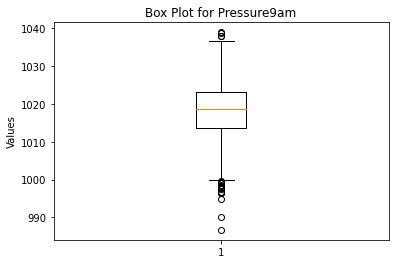

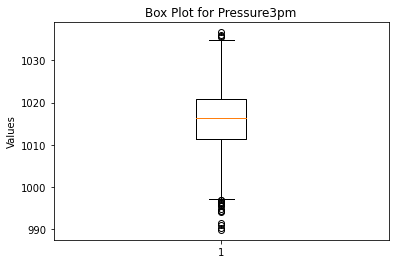

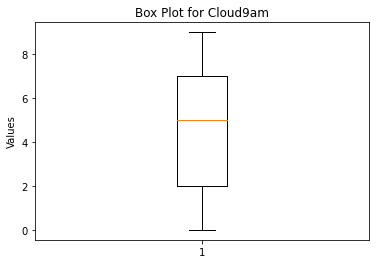

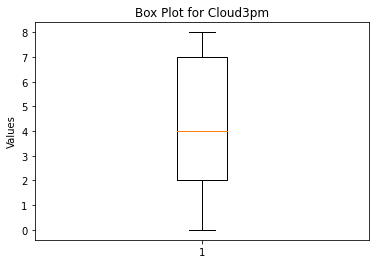

In [9]:
#visualizing quantitative variables by using boxplot
for column in quant.columns:
    plt.boxplot(quant[column])
    
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()
#shows no signs of strong univariate outliers might be treated by scaling the data

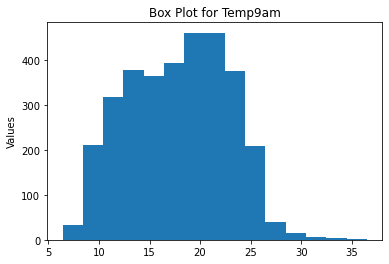

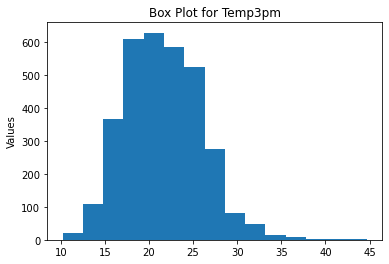

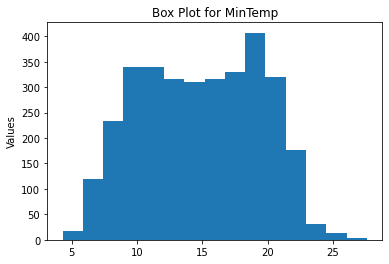

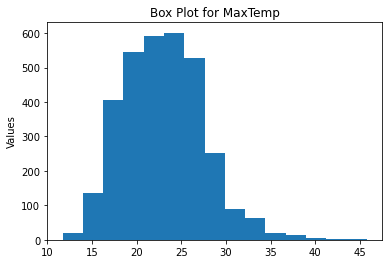

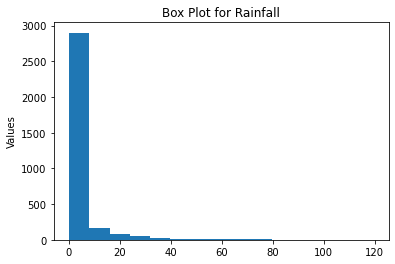

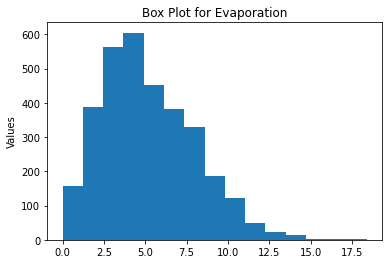

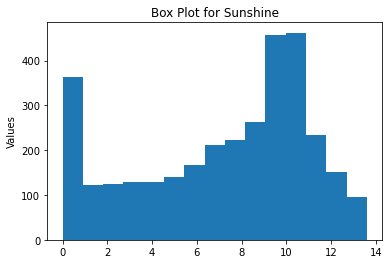

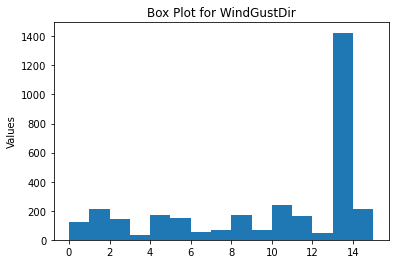

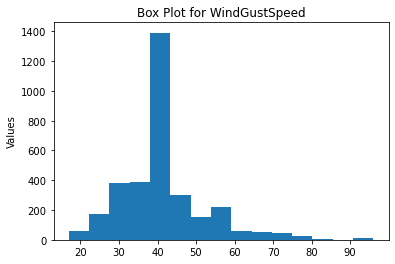

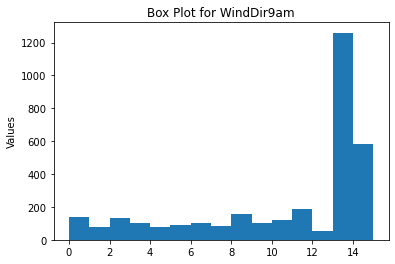

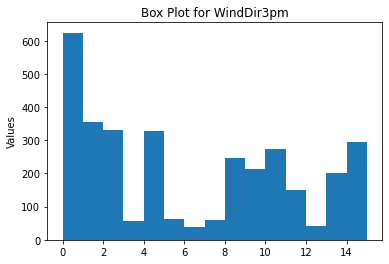

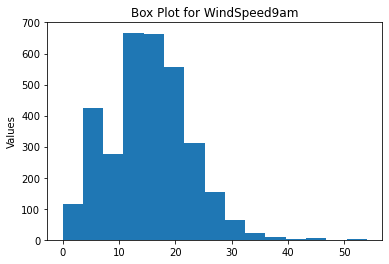

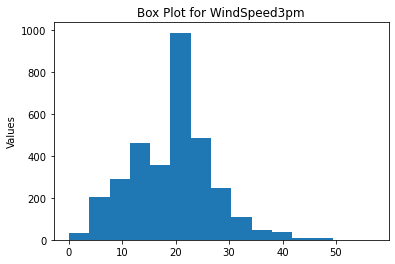

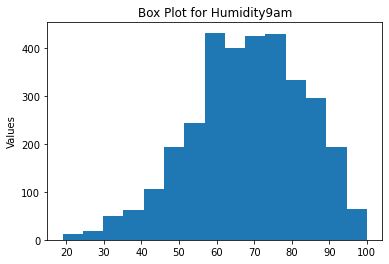

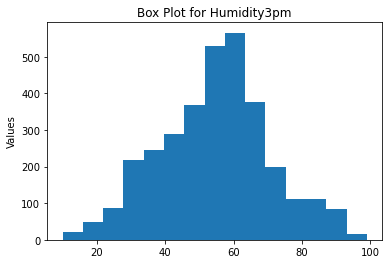

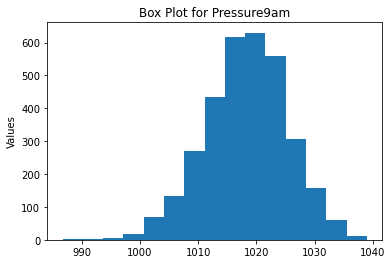

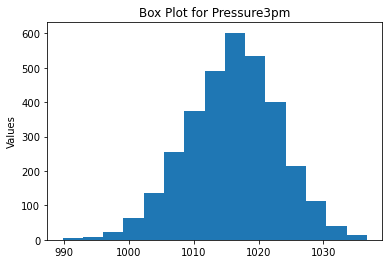

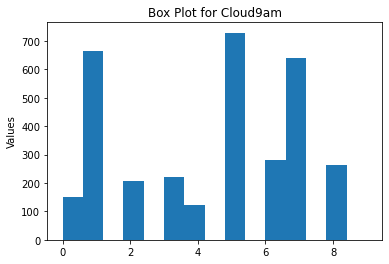

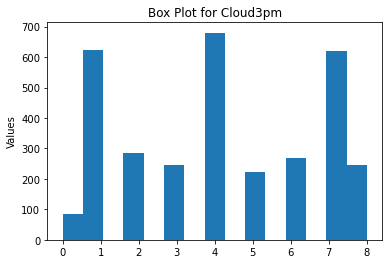

In [10]:
#visualizing quantitative variables by using histogram
for column in quant.columns:
    plt.hist(quant[column],bins=15)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

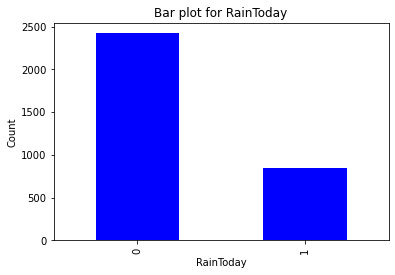

In [11]:
#visualizing qualitative variables by using barplot
for col in quali:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Bar plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [12]:
#scalling normally distributed data using z score scaler
#scalling similar pairs 

pressure_to_scale = ['Pressure9am','Pressure3pm']

zscaler = StandardScaler()
scaled_pressure = zscaler.fit_transform(df[pressure_to_scale])
df[pressure_to_scale] = scaled_pressure


Wind_to_scale = ['WindGustSpeed','WindSpeed9am','WindSpeed3pm']
zscaler=StandardScaler()
scaled_Wind = zscaler.fit_transform(df[Wind_to_scale])
df[Wind_to_scale] = scaled_Wind


temp_to_scale = ['Temp9am','Temp3pm']
zscaler = StandardScaler()
scaled_temp = zscaler.fit_transform(df[temp_to_scale])
df[temp_to_scale] = scaled_temp


MinMaxtemp_to_scale = ['MinTemp','MaxTemp']
zscaler = StandardScaler()
scaled_MinMaxtemp = zscaler.fit_transform(df[MinMaxtemp_to_scale])
df[MinMaxtemp_to_scale] = scaled_MinMaxtemp

df

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,0.588229,-0.149813,1.015126,-0.135078,15.6,1,6.2,0.0,13,...,8,11,0.273041,0.094683,92,84,-0.104633,0.199024,8,8
1,02-02-13,0.935624,0.757924,1.015126,0.578719,6.0,1,3.4,2.7,13,...,13,0,-0.862879,-0.844638,83,73,-0.061892,0.056550,7,7
2,03-02-13,1.160409,0.338969,1.476258,0.333351,6.6,1,2.4,0.1,13,...,2,2,0.273041,-2.320714,88,86,-0.232857,-0.057429,7,8
3,04-02-13,0.731274,-0.149813,1.168837,-0.045853,18.8,1,2.2,0.0,13,...,5,0,0.982991,0.094683,83,90,-0.589032,-0.598829,8,8
4,05-02-13,0.956059,0.920852,1.059043,0.601025,77.4,1,4.8,0.0,13,...,5,13,-0.578899,-1.783959,88,74,-1.429605,-1.596144,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,-1.496140,-0.848073,-1.378367,-0.759650,0.0,0,2.0,7.8,10,...,13,10,0.982991,0.094683,73,52,1.077868,1.324565,2,2
3267,12-01-22,-1.393965,-0.661870,-1.224656,-0.848875,0.0,0,2.0,9.2,13,...,13,2,0.699011,-1.649771,78,53,1.448291,1.224834,2,2
3268,13-01-22,-1.557445,-0.987725,-1.202698,-1.183467,0.0,0,2.4,2.7,13,...,14,3,-0.010939,-0.844638,85,56,0.351271,-0.142913,6,6
3269,14-01-22,-1.107875,-0.592044,-1.048987,-0.826569,0.0,0,1.4,9.3,13,...,13,13,0.273041,-0.039506,56,35,-0.147374,-0.128666,5,2


In [13]:
#transformming non normalliy distributed data 


Vtransform = ['Rainfall','Evaporation','Sunshine','Humidity9am','Humidity3pm']
for i in Vtransform:
    df[i] = np.log(df[i] + 0.0000001) # adding a very small value to the variable so we can avoid log0


df



,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,0.588229,-0.149813,1.015126,-0.135078,2.747271,1,1.824549,-16.118096,13,...,8,11,0.273041,0.094683,4.521789,4.430817,-0.104633,0.199024,8,8
1,02-02-13,0.935624,0.757924,1.015126,0.578719,1.791759,1,1.223775,0.993252,13,...,13,0,-0.862879,-0.844638,4.418841,4.290459,-0.061892,0.056550,7,7
2,03-02-13,1.160409,0.338969,1.476258,0.333351,1.887070,1,0.875469,-2.302584,13,...,2,2,0.273041,-2.320714,4.477337,4.454347,-0.232857,-0.057429,7,8
3,04-02-13,0.731274,-0.149813,1.168837,-0.045853,2.933857,1,0.788457,-16.118096,13,...,5,0,0.982991,0.094683,4.418841,4.499810,-0.589032,-0.598829,8,8
4,05-02-13,0.956059,0.920852,1.059043,0.601025,4.348987,1,1.568616,-16.118096,13,...,5,13,-0.578899,-1.783959,4.477337,4.304065,-1.429605,-1.596144,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,-1.496140,-0.848073,-1.378367,-0.759650,-16.118096,0,0.693147,2.054124,10,...,13,10,0.982991,0.094683,4.290459,3.951244,1.077868,1.324565,2,2
3267,12-01-22,-1.393965,-0.661870,-1.224656,-0.848875,-16.118096,0,0.693147,2.219203,13,...,13,2,0.699011,-1.649771,4.356709,3.970292,1.448291,1.224834,2,2
3268,13-01-22,-1.557445,-0.987725,-1.202698,-1.183467,-16.118096,0,0.875469,0.993252,13,...,14,3,-0.010939,-0.844638,4.442651,4.025352,0.351271,-0.142913,6,6
3269,14-01-22,-1.107875,-0.592044,-1.048987,-0.826569,-16.118096,0,0.336472,2.230014,13,...,13,13,0.273041,-0.039506,4.025352,3.555348,-0.147374,-0.128666,5,2


In [14]:
#scaling transformed and discrete variabels using minmax scaling

from sklearn.preprocessing import MinMaxScaler

MinMaxScale = ['Rainfall','Evaporation','Sunshine','Humidity9am','Humidity3pm','WindGustDir','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm']

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[MinMaxScale])
df[MinMaxScale] = scaled


In [15]:
df

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,0.588229,-0.149813,1.015126,-0.135078,0.902624,1,0.942839,0.000000,0.866667,...,0.533333,0.733333,0.273041,0.094683,0.949792,0.928331,-0.104633,0.199024,0.888889,1.000
1,02-02-13,0.935624,0.757924,1.015126,0.578719,0.856907,1,0.911270,0.913669,0.866667,...,0.866667,0.000000,-0.862879,-0.844638,0.887803,0.867108,-0.061892,0.056550,0.777778,0.875
2,03-02-13,1.160409,0.338969,1.476258,0.333351,0.861467,1,0.892967,0.737686,0.866667,...,0.133333,0.133333,0.273041,-2.320714,0.923026,0.938595,-0.232857,-0.057429,0.777778,1.000
3,04-02-13,0.731274,-0.149813,1.168837,-0.045853,0.911552,1,0.888395,0.000000,0.866667,...,0.333333,0.000000,0.982991,0.094683,0.887803,0.958426,-0.589032,-0.598829,0.888889,1.000
4,05-02-13,0.956059,0.920852,1.059043,0.601025,0.979259,1,0.929390,0.000000,0.866667,...,0.333333,0.866667,-0.578899,-1.783959,0.923026,0.873042,-1.429605,-1.596144,0.888889,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,-1.496140,-0.848073,-1.378367,-0.759650,0.000000,0,0.883387,0.970315,0.666667,...,0.866667,0.666667,0.982991,0.094683,0.810499,0.719142,1.077868,1.324565,0.222222,0.250
3267,12-01-22,-1.393965,-0.661870,-1.224656,-0.848875,0.000000,0,0.883387,0.979129,0.866667,...,0.866667,0.133333,0.699011,-1.649771,0.850390,0.727451,1.448291,1.224834,0.222222,0.250
3268,13-01-22,-1.557445,-0.987725,-1.202698,-1.183467,0.000000,0,0.892967,0.913669,0.866667,...,0.933333,0.200000,-0.010939,-0.844638,0.902140,0.751468,0.351271,-0.142913,0.666667,0.750
3269,14-01-22,-1.107875,-0.592044,-1.048987,-0.826569,0.000000,0,0.864644,0.979707,0.866667,...,0.866667,0.866667,0.273041,-0.039506,0.650866,0.546453,-0.147374,-0.128666,0.555556,0.250


In [16]:
#removing multivariate outliers by comparing results of dbscan and isolation forest
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

clusters = DBSCAN(eps=5, min_samples=5)
clusters.fit(quant)
dataframe_dbscan = clusters.fit_predict(quant)


Isolate = IsolationForest()
Isolate.fit(quant)
dataframe_iF = Isolate.predict(quant)


In [17]:
dataframe_filter_If = (dataframe_iF == -1)
clustering_filter = (dataframe_dbscan == -1)
complete_filter = np.logical_and(clustering_filter, dataframe_filter_If)
df.drop(quant[complete_filter].index, axis= 0,inplace=True)
df
#after removing multivariate outliers we reduced the no of rows(observations) in the df

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,0.588229,-0.149813,1.015126,-0.135078,0.902624,1,0.942839,0.000000,0.866667,...,0.533333,0.733333,0.273041,0.094683,0.949792,0.928331,-0.104633,0.199024,0.888889,1.000
1,02-02-13,0.935624,0.757924,1.015126,0.578719,0.856907,1,0.911270,0.913669,0.866667,...,0.866667,0.000000,-0.862879,-0.844638,0.887803,0.867108,-0.061892,0.056550,0.777778,0.875
2,03-02-13,1.160409,0.338969,1.476258,0.333351,0.861467,1,0.892967,0.737686,0.866667,...,0.133333,0.133333,0.273041,-2.320714,0.923026,0.938595,-0.232857,-0.057429,0.777778,1.000
3,04-02-13,0.731274,-0.149813,1.168837,-0.045853,0.911552,1,0.888395,0.000000,0.866667,...,0.333333,0.000000,0.982991,0.094683,0.887803,0.958426,-0.589032,-0.598829,0.888889,1.000
5,06-02-13,1.221714,1.037228,1.168837,0.935617,0.793667,1,0.897173,0.975528,0.866667,...,0.866667,0.066667,-0.862879,0.363060,0.776566,0.795865,-2.227438,-2.479481,0.666667,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,-1.496140,-0.848073,-1.378367,-0.759650,0.000000,0,0.883387,0.970315,0.666667,...,0.866667,0.666667,0.982991,0.094683,0.810499,0.719142,1.077868,1.324565,0.222222,0.250
3267,12-01-22,-1.393965,-0.661870,-1.224656,-0.848875,0.000000,0,0.883387,0.979129,0.866667,...,0.866667,0.133333,0.699011,-1.649771,0.850390,0.727451,1.448291,1.224834,0.222222,0.250
3268,13-01-22,-1.557445,-0.987725,-1.202698,-1.183467,0.000000,0,0.892967,0.913669,0.866667,...,0.933333,0.200000,-0.010939,-0.844638,0.902140,0.751468,0.351271,-0.142913,0.666667,0.750
3269,14-01-22,-1.107875,-0.592044,-1.048987,-0.826569,0.000000,0,0.864644,0.979707,0.866667,...,0.866667,0.866667,0.273041,-0.039506,0.650866,0.546453,-0.147374,-0.128666,0.555556,0.250


In [18]:
#feature selection
#applying variance threshold method
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(5)
selector.fit(quant)
features_to_keep = selector.get_support()
selected_data = selector.transform(quant)
features_to_keep
#no features to drop

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

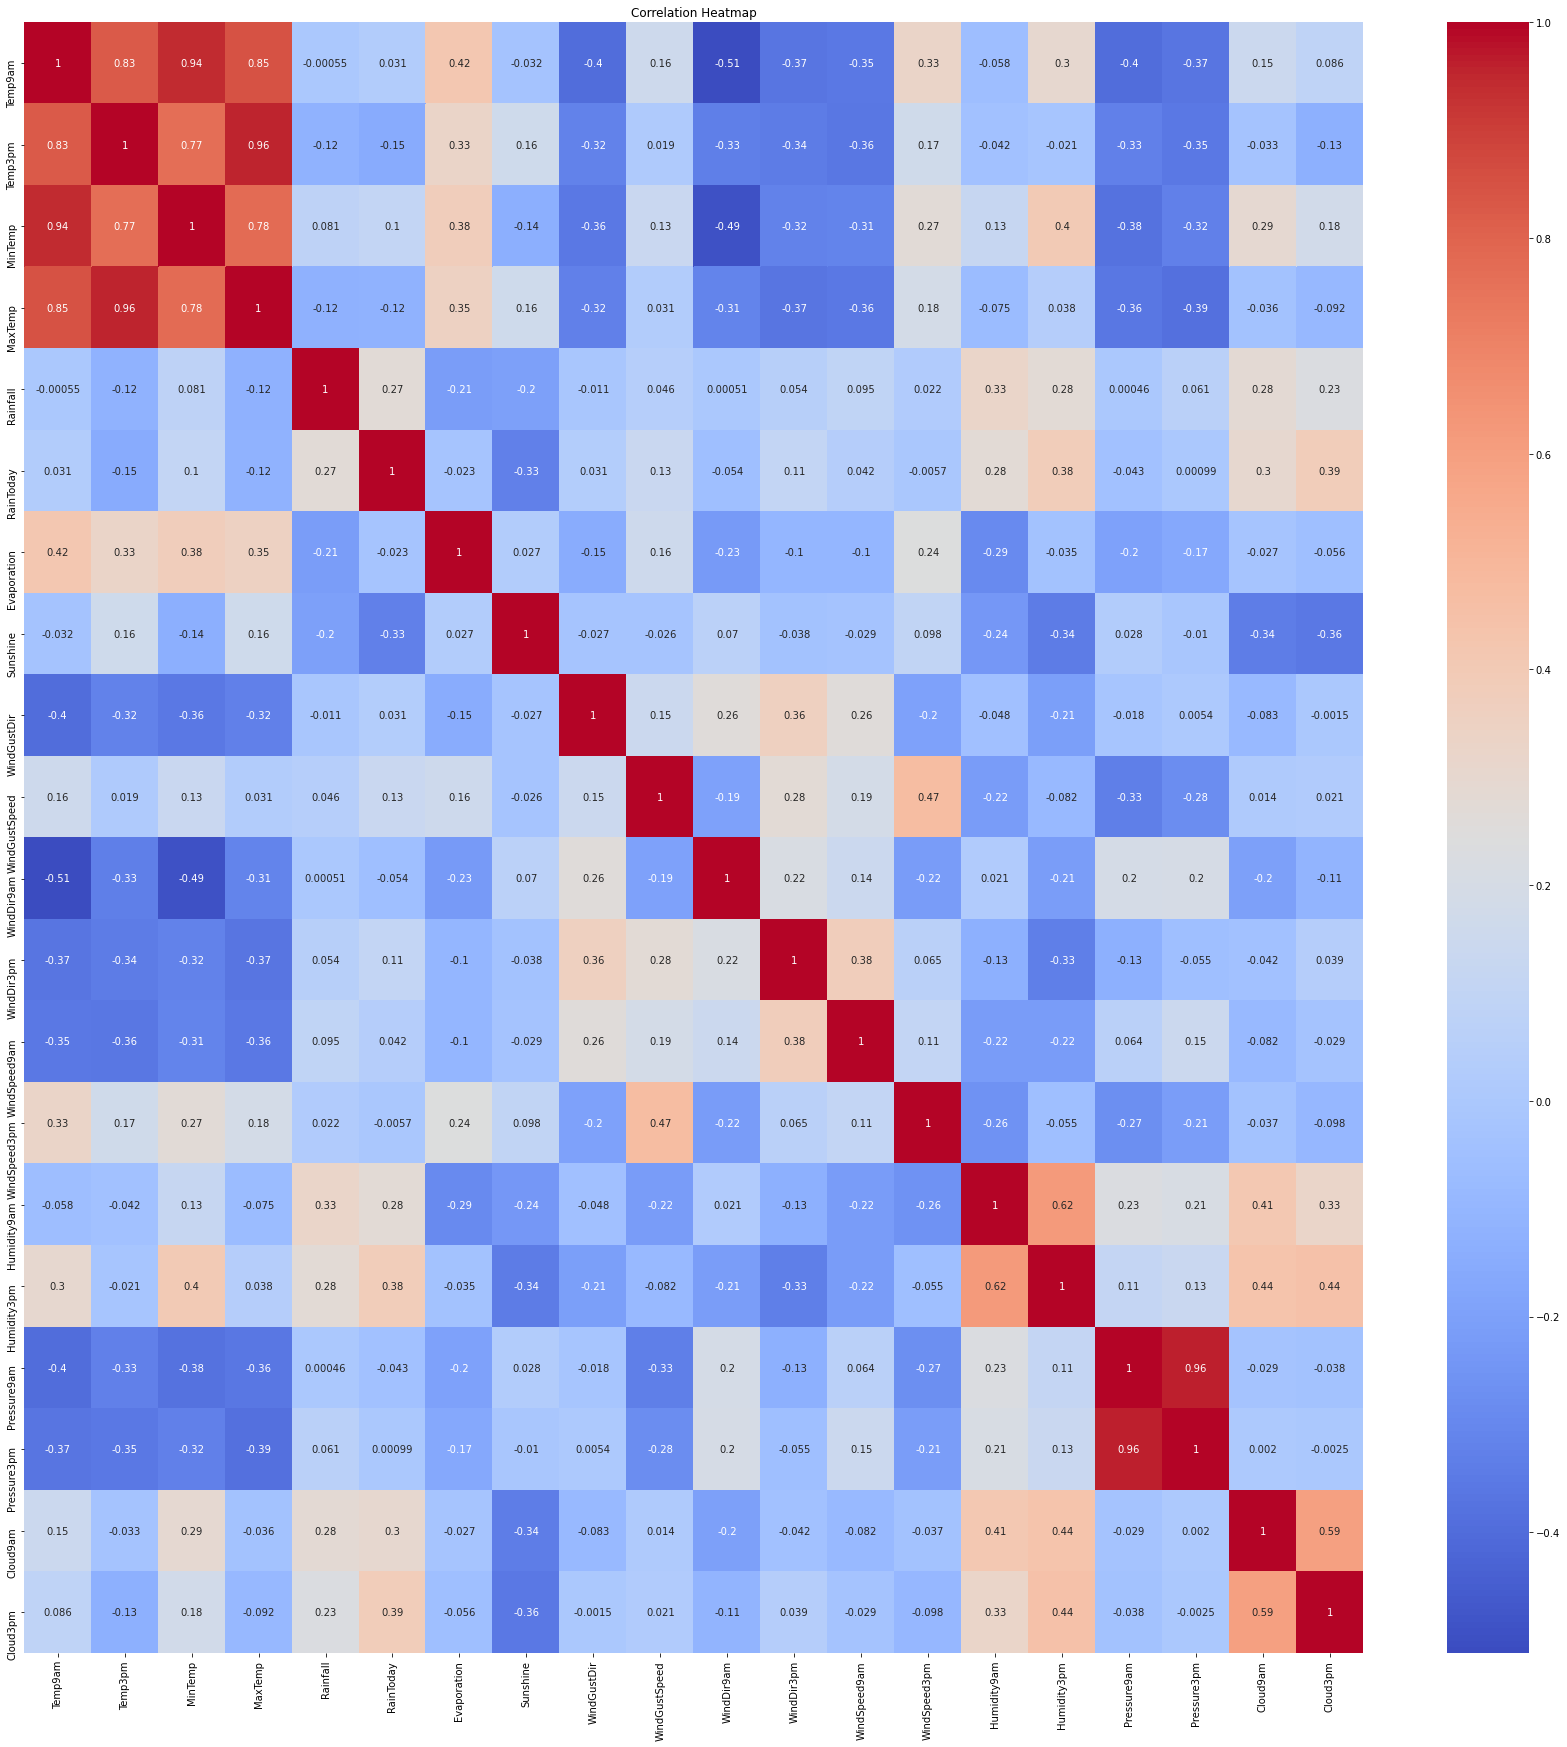

In [19]:
corr_matrix=(df.corr())
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
#removing features with correlation of >0.5
col_corr=set()
corr_matrix=df.corr()
thereshold = 0.5
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>0.5:
            colname=corr_matrix.columns[i]
            col_corr.add(colname)
    
col_corr
df=df.drop(col_corr,axis=1)
data=df
df

,Date,Temp9am,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Cloud9am
0,01-02-13,0.588229,0.902624,1,0.942839,0.000000,0.866667,-0.044081,0.733333,0.273041,0.094683,0.949792,-0.104633,0.888889
1,02-02-13,0.935624,0.856907,1,0.911270,0.913669,0.866667,-0.044081,0.000000,-0.862879,-0.844638,0.887803,-0.061892,0.777778
2,03-02-13,1.160409,0.861467,1,0.892967,0.737686,0.866667,-0.044081,0.133333,0.273041,-2.320714,0.923026,-0.232857,0.777778
3,04-02-13,0.731274,0.911552,1,0.888395,0.000000,0.866667,-0.044081,0.000000,0.982991,0.094683,0.887803,-0.589032,0.888889
5,06-02-13,1.221714,0.793667,1,0.897173,0.975528,0.866667,-0.044081,0.066667,-0.862879,0.363060,0.776566,-2.227438,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,-1.496140,0.000000,0,0.883387,0.970315,0.666667,-0.414270,0.666667,0.982991,0.094683,0.810499,1.077868,0.222222
3267,12-01-22,-1.393965,0.000000,0,0.883387,0.979129,0.866667,-1.062100,0.133333,0.699011,-1.649771,0.850390,1.448291,0.222222
3268,13-01-22,-1.557445,0.000000,0,0.892967,0.913669,0.866667,-1.617383,0.200000,-0.010939,-0.844638,0.902140,0.351271,0.666667
3269,14-01-22,-1.107875,0.000000,0,0.864644,0.979707,0.866667,0.141014,0.866667,0.273041,-0.039506,0.650866,-0.147374,0.555556


In [21]:
# seing what affects raintoday by anova table
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('RainToday ~ Temp9am+ Rainfall + Evaporation + Sunshine + WindGustDir +WindGustSpeed  + WindDir3pm + WindSpeed3pm + WindSpeed9am +  Humidity9am + Pressure9am + Cloud9am ', data=df).fit()
anova=sm.stats.anova_lm(model,typ=2)
print(anova)


                   sum_sq      df           F        PR(>F)
Temp9am          0.134987     1.0    0.968937  3.250291e-01
Rainfall         7.192573     1.0   51.628127  8.527546e-13
Evaporation      1.312751     1.0    9.422896  2.163130e-03
Sunshine        17.596052     1.0  126.304066  1.050568e-28
WindGustDir      0.000577     1.0    0.004139  9.487053e-01
WindGustSpeed    5.238527     1.0   37.602029  9.875058e-10
WindDir3pm       2.553002     1.0   18.325390  1.923599e-05
WindSpeed3pm     0.248855     1.0    1.786274  1.814875e-01
WindSpeed9am     0.604357     1.0    4.338058  3.735843e-02
Humidity9am     13.048340     1.0   93.660698  8.086130e-22
Pressure9am      0.086832     1.0    0.623277  4.298980e-01
Cloud9am         4.619863     1.0   33.161275  9.388517e-09
Residual       396.769132  2848.0         NaN           NaN


<AxesSubplot:>

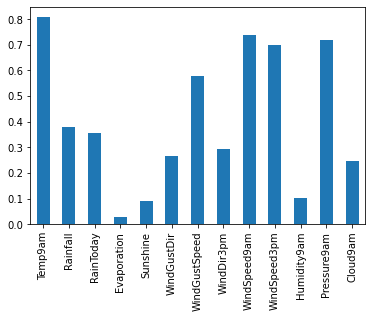

In [22]:
#applying and visulaizing MAD
a=df.mad(axis = 0) 
a
a.plot.bar()

In [23]:
# by looking at MAD plot and anova results we can drop WindGustDir 
dropWGD='WindGustDir'
df=df.drop(dropWGD,axis=1)
df

,Date,Temp9am,Rainfall,RainToday,Evaporation,Sunshine,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Cloud9am
0,01-02-13,0.588229,0.902624,1,0.942839,0.000000,-0.044081,0.733333,0.273041,0.094683,0.949792,-0.104633,0.888889
1,02-02-13,0.935624,0.856907,1,0.911270,0.913669,-0.044081,0.000000,-0.862879,-0.844638,0.887803,-0.061892,0.777778
2,03-02-13,1.160409,0.861467,1,0.892967,0.737686,-0.044081,0.133333,0.273041,-2.320714,0.923026,-0.232857,0.777778
3,04-02-13,0.731274,0.911552,1,0.888395,0.000000,-0.044081,0.000000,0.982991,0.094683,0.887803,-0.589032,0.888889
5,06-02-13,1.221714,0.793667,1,0.897173,0.975528,-0.044081,0.066667,-0.862879,0.363060,0.776566,-2.227438,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,-1.496140,0.000000,0,0.883387,0.970315,-0.414270,0.666667,0.982991,0.094683,0.810499,1.077868,0.222222
3267,12-01-22,-1.393965,0.000000,0,0.883387,0.979129,-1.062100,0.133333,0.699011,-1.649771,0.850390,1.448291,0.222222
3268,13-01-22,-1.557445,0.000000,0,0.892967,0.913669,-1.617383,0.200000,-0.010939,-0.844638,0.902140,0.351271,0.666667
3269,14-01-22,-1.107875,0.000000,0,0.864644,0.979707,0.141014,0.866667,0.273041,-0.039506,0.650866,-0.147374,0.555556


In [24]:
#applying PCA
dropDate='Date'
df=df.drop(dropDate,axis=1)

dropRT='RainToday'
numerical=df.drop(dropRT,axis=1)


from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

#  Fit the data to the PCA model
pca.fit(numerical)

X_pca = pca.transform(numerical)
X_pca.shape
#after applying pca w get 6 features

(2861, 6)

In [25]:
#split the data into train and test

from sklearn.model_selection import train_test_split
X = X_pca
y = df['RainToday']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
X

array([[ 0.53971009,  0.13879636,  0.090648  , -0.48725746,  0.34180399,
         0.81414517],
       [ 0.41120891, -1.25878869,  0.28573802, -0.03754025,  0.79630861,
         0.55652957],
       [-0.27624364, -0.97809269,  1.41171239, -0.86155965,  1.82773357,
         0.43337429],
       ...,
       [-1.93608291, -0.28489625,  0.49118729, -0.06956825, -1.01492317,
        -0.08169301],
       [-0.40943077,  0.85363298,  0.44058136,  0.59111874, -0.36345011,
        -0.20760311],
       [-1.46781253,  0.11583434,  0.77722392,  0.85359296, -0.69310163,
        -0.27411752]])

# classification models

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
predict_RandomForest=clf.predict(x_test)

accuracyCLF = accuracy_score(y_test, predict_RandomForest)
confusionCLF = confusion_matrix(y_test,predict_RandomForest)
precisionCLF = precision_score(y_test, predict_RandomForest)

print("Accuracy:", accuracyCLF)
print("Confusion Matrix:",confusionCLF)
print("Precision:", precisionCLF)

Accuracy: 0.8090803259604191
Confusion Matrix: [[628  35]
 [129  67]]
Precision: 0.6568627450980392


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

XGBoost=GradientBoostingClassifier()
XGBoost.fit(x_train,y_train)
predict_XG=XGBoost.predict(x_test)

accuracyXG = accuracy_score(y_test, predict_XG)
confusionXG = confusion_matrix(y_test,predict_XG)
precisionXG = precision_score(y_test, predict_XG)

print("Accuracy:", accuracyXG)
print("Confusion Matrix:",confusionXG)
print("Precision:", precisionXG)

Accuracy: 0.8055878928987195
Confusion Matrix: [[626  37]
 [130  66]]
Precision: 0.6407766990291263


In [28]:
from sklearn.tree import DecisionTreeClassifier
modelDT=DecisionTreeClassifier(criterion='entropy')
modelDT.fit(x_train,y_train)
y_pred_dt=modelDT.predict(x_test)

accuracyRF = accuracy_score(y_test, y_pred_dt)
confusion_rf = confusion_matrix(y_test, y_pred_dt)
precision_rf = precision_score(y_test, y_pred_dt)

print("Accuracy:", accuracyRF)
print("\nConfusion Matrix:")
print(confusion_rf)
print("Precision:", precision_rf)

Accuracy: 0.7147846332945286

Confusion Matrix:
[[537 126]
 [119  77]]
Precision: 0.3793103448275862


In [ ]:
# by trying most of the classiffiers methods XGBoost is the accurate and precise model

### REGRISSION MODELS

In [ ]:
#redoing the feature selection methods for 

In [29]:
dropDate='Date'
data=data.drop(dropDate,axis=1)

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model1 = ols('Rainfall ~ Temp9am+ RainToday+ Evaporation + Sunshine + WindGustDir +WindGustSpeed  + WindDir3pm + WindSpeed3pm + WindSpeed9am +  Humidity9am + Pressure9am + Cloud9am ', data=data).fit()
anova=sm.stats.anova_lm(model1,typ=2)
print(anova)


                   sum_sq      df           F        PR(>F)
Temp9am          1.211039     1.0    9.980418  1.598718e-03
RainToday        6.264636     1.0   51.628127  8.527546e-13
Evaporation     10.776050     1.0   88.807598  8.706060e-21
Sunshine         0.965027     1.0    7.952983  4.834032e-03
WindGustDir      0.240257     1.0    1.980007  1.594988e-01
WindGustSpeed    0.113452     1.0    0.934982  3.336537e-01
WindDir3pm       0.175539     1.0    1.446655  2.291655e-01
WindSpeed3pm     1.512917     1.0   12.468255  4.204927e-04
WindSpeed9am     7.083582     1.0   58.377222  2.936049e-14
Humidity9am     16.266877     1.0  134.058602  2.505941e-30
Pressure9am      0.266890     1.0    2.199491  1.381670e-01
Cloud9am         4.505119     1.0   37.127590  1.255508e-09
Residual       345.580695  2848.0         NaN           NaN


<AxesSubplot:>

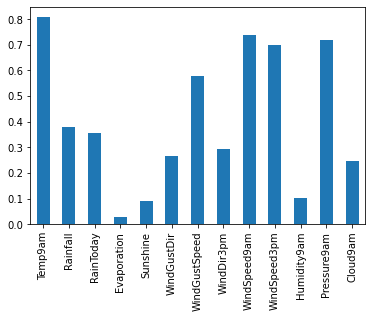

In [31]:
a=data.mad(axis = 0) 
a
a.plot.bar()

In [32]:
#by comparing results of MAD and anova we drop the common resutls
dropGDir='WindGustDir'
dropDir='WindDir3pm'

data=data.drop(dropGDir,axis=1)
data=data.drop(dropDir,axis=1)

data

,Temp9am,Rainfall,RainToday,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Cloud9am
0,0.588229,0.902624,1,0.942839,0.000000,-0.044081,0.273041,0.094683,0.949792,-0.104633,0.888889
1,0.935624,0.856907,1,0.911270,0.913669,-0.044081,-0.862879,-0.844638,0.887803,-0.061892,0.777778
2,1.160409,0.861467,1,0.892967,0.737686,-0.044081,0.273041,-2.320714,0.923026,-0.232857,0.777778
3,0.731274,0.911552,1,0.888395,0.000000,-0.044081,0.982991,0.094683,0.887803,-0.589032,0.888889
5,1.221714,0.793667,1,0.897173,0.975528,-0.044081,-0.862879,0.363060,0.776566,-2.227438,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
3266,-1.496140,0.000000,0,0.883387,0.970315,-0.414270,0.982991,0.094683,0.810499,1.077868,0.222222
3267,-1.393965,0.000000,0,0.883387,0.979129,-1.062100,0.699011,-1.649771,0.850390,1.448291,0.222222
3268,-1.557445,0.000000,0,0.892967,0.913669,-1.617383,-0.010939,-0.844638,0.902140,0.351271,0.666667
3269,-1.107875,0.000000,0,0.864644,0.979707,0.141014,0.273041,-0.039506,0.650866,-0.147374,0.555556


In [33]:
#separating the target variable
a='Rainfall'
numerical2=data.drop(a,axis=1)
numerical2

,Temp9am,RainToday,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Cloud9am
0,0.588229,1,0.942839,0.000000,-0.044081,0.273041,0.094683,0.949792,-0.104633,0.888889
1,0.935624,1,0.911270,0.913669,-0.044081,-0.862879,-0.844638,0.887803,-0.061892,0.777778
2,1.160409,1,0.892967,0.737686,-0.044081,0.273041,-2.320714,0.923026,-0.232857,0.777778
3,0.731274,1,0.888395,0.000000,-0.044081,0.982991,0.094683,0.887803,-0.589032,0.888889
5,1.221714,1,0.897173,0.975528,-0.044081,-0.862879,0.363060,0.776566,-2.227438,0.666667
...,...,...,...,...,...,...,...,...,...,...
3266,-1.496140,0,0.883387,0.970315,-0.414270,0.982991,0.094683,0.810499,1.077868,0.222222
3267,-1.393965,0,0.883387,0.979129,-1.062100,0.699011,-1.649771,0.850390,1.448291,0.222222
3268,-1.557445,0,0.892967,0.913669,-1.617383,-0.010939,-0.844638,0.902140,0.351271,0.666667
3269,-1.107875,0,0.864644,0.979707,0.141014,0.273041,-0.039506,0.650866,-0.147374,0.555556


In [34]:
pca_reg = PCA(n_components=0.95)

#  Fit the data to the PCA model
pca_reg.fit(numerical2)

X_pca_reg = pca_reg.transform(numerical2)
X_pca_reg.shape
#after applying pca we got 5 features 

(2861, 6)

In [35]:
#splitting the data into train and test
X_regression = X_pca_reg
y_regression_rainfall = df['Rainfall']


X_train_reg, X_test_reg, y_train_rainfall, y_test_rainfall = train_test_split(X_regression, y_regression_rainfall, test_size=0.2, random_state=0)
y_regression_rainfall

0       0.902624
1       0.856907
2       0.861467
3       0.911552
5       0.793667
          ...   
3266    0.000000
3267    0.000000
3268    0.000000
3269    0.000000
3270    0.000000
Name: Rainfall, Length: 2861, dtype: float64

In [36]:
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.linear_model import LinearRegression

reg_rainfall = RandomForestRegressor()
reg_rainfall.fit(X_train_reg, y_train_rainfall)
y_pred_rainfall = reg_rainfall.predict(X_test_reg)

mse_rainfall = mean_squared_error(y_test_rainfall, y_pred_rainfall)
print("Mean Squared Error - Rainfall Regression Model:", mse_rainfall)
r2 = r2_score(y_test_rainfall, y_pred_rainfall)
print(r2)

Mean Squared Error - Rainfall Regression Model: 0.13060475920153633
0.1686378112116741


In [37]:
LR = LinearRegression()
LR.fit(X_train_reg, y_train_rainfall)
y_predSK = LR.predict(X_test_reg)

mse= mean_squared_error(y_test_rainfall ,y_predSK)
r2 = r2_score(y_test_rainfall, y_predSK)
print('MSE:',mse)
print('R squared:', r2)

MSE: 0.13821614806176272
R squared: 0.12018765563355738


In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)  
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)
modelP = LinearRegression()
modelP.fit(X_train_poly, y_train)
y_predP = modelP.predict(X_test_poly)

mse= mean_squared_error(y_test, y_predP)
r2 = r2_score(y_test, y_predP)
print('MSE:',mse)
print('R squared:', r2)

MSE: 0.14009441555706062
R squared: 0.20450482157740446


In [ ]:
#after applying multiple regression models we get the best results from polynomial features regression model with r^2 of 0.2 
#so we get that this model explains 20% of the variations of the data